In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
redwine = pd.read_csv(r'C:\Users\suyog\DeepLearning\dataset\red-wine.csv')

In [5]:
df_train = redwine.sample(frac=0.7, random_state=0)
df_valid = redwine.drop(df_train.index)

In [7]:
#split training and validation splits
df_train = redwine.sample(frac=0.7, random_state=0)
df_valid = redwine.drop(df_train.index)

In [8]:
#split feature and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [15]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

<Axes: >

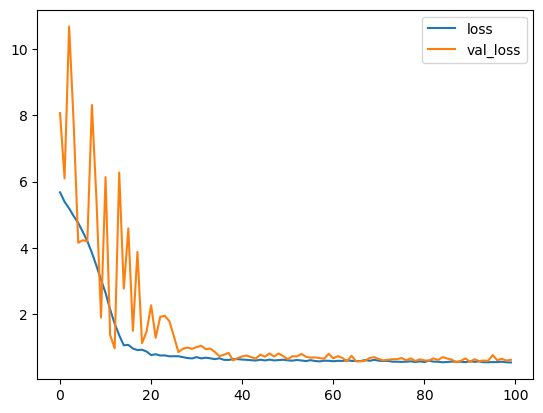

In [17]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()